<a href="https://colab.research.google.com/github/mahynski/chemometric-carpentry/blob/main/notebooks/1.3_Chemometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
❓ ***Objective***: This notebook will introduce you to the field of chemometrics and motivate applications.  

🔁 ***Remember***: You can always revisit this notebook for reference again in the future.  Ideas and best practices will be reinforced in future notebooks, so don't worry about remembering everything the first time you see something new.

🧑 Author: Nathan A. Mahynski

📆 Date: May 1, 2024

---


Ok the course so far was probably a lot, 😐 especially if you are new to progamming in general.  Remember 🤔 how we said that one of the reasons you should learn Python is the "Rich ecosystem of third-party packages (don't reinvent the 🎡)"?  The good news🙏 is that from here on out you will mostly be using a "wheel" we have been developing and only need to do basic operations like `import` a function, make a plot, or upload new data to your Google Drive.  

We have done the work to set up a centralized toolkit 🔧 for chemometric analysis.  This is what [PyChemAuth](https://pychemauth.readthedocs.io/en/latest/index.html) is.  This also stands on the shoulders of many giants and relies on other wheels 🎡 out there in the Python 🐍 ecosystem.  It is not perfect (yet) and that is where we need your help!

The rest of this course will focus on performing analyses using [PyChemAuth](https://pychemauth.readthedocs.io/en/latest/index.html) and related tools.  It is our hope that some of the existing capabilities will immediately benefit you by providing code to handle some of your existing tasks.  

1. In the near term 📅, we would like to work with you to create "standardized" Jupyter notebooks for these tasks. This will make your work more reproducible and transparent, and allow your current and future coworkers to perform the same analysis in exactly the same way!  

2. In the future ⏰ we would like to work with you to develop new tools and algorithms as needs arise. The world 🌎 is a big place and different communities may have different algorithms and approaches to analyses, data manipulations, etc. so [PyChemAuth](https://pychemauth.readthedocs.io/en/latest/index.html) will certainly have deficiencies. Let us know how we improve and grow! ✅

With that, let's move on to the field of chemometrics! ⏩




# The Authentication Problem

## Some Motivating Examples

### Economically Motivated Adulteration (EMA)

As international supply chains increase in complexity, it is increasingly difficult to reliably trace the source of commodities from the point of consumption or use back to their origin.  While this can be said of many consumer products, food and food products are some of the most high profile because of the risk their adulteration poses to human and environmental health. [The U.S. Food and Drug Administration (FDA) reported nearly 800 food recalls from 2017 through 2019, of which 51% were attributed to the presence of undeclared allergens and 40% were based microbial contamination](https://doi.org/10.6028/NIST.SP.1251). The Centers for Disease Control and Prevention estimates that each year, 1 in 6 Americans get sick and 3,000 die from consumption of contaminated foods and beverages.  This is because foods and related products may be (usually) unintentionally adulterated or contaminated with harmful chemicals (e.g., pesticides) or biological factors (e.g., mycotoxins) during the adulteration process.  [The financial cost of global food fraud is estimated at 10-15 billion USD](https://onlinelibrary.wiley.com/doi/abs/10.1111/1750-3841.13256), and an estimated [600 million people fall ill while 420,000 die globally every year after eating contaminated food](https://link.springer.com/article/10.1186/s12199-019-0825-5). These losses are only [expected to increase in the coming years](https://www.sciencedirect.com/science/article/pii/S0956713520304321), due to globalization and the increasing vulnerability of supply chains, which leads to the suspicion that more nefarious schemes to intentionally adulterated foods are on the rise.

This so-called "food fraud" often involves "economically motivated adulteration" (EMA), which is the [fraudulent addition of non-authentic substances or removal or replacement of authentic ones for the explicit purpose of deceiving the purchases for the economic gain of the seller](http://www.fredsakademiet.dk/ORDBOG/lord/food_fraud.pdf). Some of the most salient examples in recent years include:

* In 1981 over 300 Spanish citizens died (and 20,000 were sickened) from a musculoskeletal disease termed ["toxic oil syndrome"](https://en.wikipedia.org/wiki/Toxic_oil_syndrome). It was traced to the consumption of colza oil intended for industrial purposes, not human consumption; however, to evade taxes it was illegally doped with aniline, then refined once imported.  It was sold as "olive oil" to consumers. There were a number of [issues proving the pathogenesis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1240833/) of TOS due to main components in this oil which has led to a number of alternative theories.

* The [2008 "Chinese Milk Scandal"](https://en.wikipedia.org/wiki/2008_Chinese_milk_scandal) involved the addition of melamine to milk to boost apparent protein content so that it could pass quality assurance tests; [melamine](https://en.wikipedia.org/wiki/Melamine) is used in the industrial production of plastics, fertilizers and even concrete. This adulteration killed 6 babies and sickened nearly 300,000 Chinese citizen. More than 20 people were convicted for their roles in the scandal, and 2 were even executed.

* In 2009, over 600 people were sickened and 9 [killed by salmonella in peanut butter](https://www.wsj.com/articles/SB123491912215304853) as a result of intentional evasion of food safety practices.

* ["Horsegate"](https://foodfraudadvisors.com/horsemeat-scandal-analysis/) was uncovered in 2013 when Irish authorities revealed they had found horsemeat in "100% beef" hamburger patties.

* ["Project Honeygate"](https://www.reuters.com/article/usa-china-honey/u-s-charges-five-in-honeygate-anti-dumping-probe-idUSL1N0BKCRX20130220) refers to the operation which started in 2008 and concluded in the 2013 uncovering that Chinese honey was being illegally imported to the US to avoid tariffs associated with anti-dumping regulations. Some of this honey was found to contain chloramphenicol, an antibiotic considered unsafe for use in the US, and has been called the ["largest food fraud in US history."](https://www.bloomberg.com/news/articles/2013-09-19/how-germany-s-alw-got-busted-for-the-largest-food-fraud-in-u-dot-s-dot-history) In fact, honey is the third most adulterated food product because of its limited production and high value; some tests have even found evidence of [food fraud in more than 75% of honeys](https://www.foodsafetynews.com/2011/11/tests-show-most-store-honey-isnt-honey/) sold in US grocery stores.

* A recent [Indian Honeygate](https://www.indiatoday.in/india/story/honeygate-and-china-connection-cse-s-adulteration-investigation-reveals-shocking-details-1746416-2020-12-03) was reported in 2020 when an investigation reported that honey from 13 top brands in India showed signs of adulteration with Chinese syrups that can defeat conventional food safety and authenticity tests.

* In 2024, elevated lead and chromium were found in [children's applesause packets](https://www.fda.gov/food/outbreaks-foodborne-illness/investigation-elevated-lead-chromium-levels-cinnamon-applesauce-pouches-november-2023) due to what is believed be [EMA of cinnamon](https://www.cbsnews.com/news/tainted-lead-applesauce-wanabana-recall-cinnamon-carlos-aguilera-accused/).

EMA is particularly rampant in certain areas.  For example, Manuka Honey is an iconic product of New Zealand, widely regarded for its purported health benefits; the country has an annual production of roughly 1,700 tons, yet [in 2013 as much as 10,000 tons of "manuka honey" appeared on the global marketplace](https://www.nature.com/articles/s41598-018-32764-w).  This is because honey is difficult to produce and highly valued, creating a large economic driver for adulteration.  While crude oil and natural gas usually steal the spotlight as the no. 1 and no. 3 most traded commodities in the world, [coffee comes in at no. 2](https://www.bllnr.sg/leadership/what-are-commodities-and-what-are-the-top-10-most-traded-commodities-in-the-world).  Since a mature coffee tree [produces only about 2 pounds](https://www.ncausa.org/About-Coffee/What-is-Coffee#:~:text=The%20average%20coffee%20tree%20produces,world%20called%20the%20Coffee%20Belt.) of green beans per year, coffee (which the reader may be drinking at this very moment) is also particularly susceptible to EMA.

### Mathematical Grounding

 How can we verify a food or product is what it says it is on its label? Adulterations come in many forms and new ones are constantly being developed. "Targeted analysis" is a term that refers to methods by which a specific component or chemical is tested for in a product.  For example, one can perform a specific chemical test to check for the presence of known antibiotic or biomarker of a known adulterant.  Assuming this biomarker specifically and uniquely represents the target, its presence or absence yields a simple "yes or no" to the question of "is this product adulterated with this species?"  Unfortunately, the situation is rarely that simple.  Moreover, most such tests are relatively slow and cannot be done in real time, say, at a port or other area of importation.

Suppose we have an unadulterated, naturally occuring product which is characterized by 2 components $a$ and $b$ in a certain ratio. Let's call this product 1.  It is possible to artificially create this product by combining pure $a$ and pure $b$ in the same mixing ratio. However, most products are highly complex chemical mixtures and their constituents are not readily available in pure form.  Assume, in this example, that $a$ and $b$ are present in a different ratio in a lower grade form of the product, called product 2.  We could imaging diluting the higher grade product with a lower grade version to increase the overall volume, but to pass a quality assurance tests the ratio must be adjusted so it looks like $a$ and $b$ appear in the correct ratio.

Suppose it is possible to find another product (product 3) with mostly $a$ and some other chemical(s) $c$; we could simply add this to the lower grade form to increase the proportion of $a$ assuming the presence of $c$ is not noticed during testing.  It is then possible to find volumes of the three ingredients, $V_1, V_2, V_3$, that can be combined to give the right amount of component volumes, $V_a, V_b$ to pass a test.

💢 This was basically the idea behind adding melamine to diluted milk to boost the apparent protein  content in the [2008 "Chinese Milk Scandal"](https://en.wikipedia.org/wiki/2008_Chinese_milk_scandal).

$$
\overbrace{
\begin{bmatrix}
V_1, & V_2, & V_3
\end{bmatrix}
}^{V}
\overbrace{
\begin{bmatrix}
x_{1,a}, & x_{1,b}, & x_{1,c}=0 \\
x_{2,a}, & x_{2,b}, & x_{2,c}=0 \\
x_{3,a}, & x_{3,b}=0, & x_{3,c}>0
\end{bmatrix}
}^{X}
=
\overbrace{
\begin{bmatrix}
V_{a} \\
V_{b} \\
V_{c}
\end{bmatrix}
}^{Y}
$$

If the total volume, $V = V_a + V_b + V_c$, the dilution ratio of the components, $y = V_a / V_b$, and the available amount of one of the one of needed components, e.g., $V_a$, are known then it may be possible to solve the above matrix expression for the volumes of each ingredient ($V_1, V_2, V_3$) needed to create a fake product: $V = Y X^{-1}$.  This assumes the fractions ($X$) of components in each ingredient are known in advance.  If $X$ is not invertible we cannot solve this and would be unable to create an inauthentic product.

However, this essentially amounts to saying that the products 1 and 2 are actually identical (i.e., that product 2 is actually not fradulent).  Why❓ Consider the following:

$$
X^{-1} \sim 1/{\rm det}(X)
$$

$$
{\rm det}(X) =
x_{3,c} * {\rm det}
\left(
\begin{bmatrix}
x_{1,a}, & x_{1,b} \\
x_{2,a}, & x_{2,b} \\
\end{bmatrix}
\right) = x_{3,c} \left( x_{1,a}x_{2,b} - x_{2,a}x_{1,b} \right)
$$

If the determinant is 0 then $X$ is not invertible.  Since $x_{3,c} > 0$, this implies for $X$ to not be invertible:

$$x_{1,a}x_{2,b} - x_{2,a}x_{1,b} = 0$$

Given that our first 2 products are only composed of $a$ and $b$, then $x_{1,b} = 1 - x_{1,a}$ and $x_{2,b} = 1 - x_{2,a}$:

$$x_{1,a}(1-x_{2,a}) - x_{2,a}(1-x_{1,a}) = 0$$
$$x_{1,a}(1-x_{2,a}) = x_{2,a}(1-x_{1,a})$$
$$x_{1,a}-x_{1,a}x_{2,a} = x_{2,a}-x_{2,a}x_{1,a}$$
$$x_{1,a} = x_{2,a}$$

In otherwords, the first two ingredients have the same composition, or are basically the same product. 😮 Since this is nonesense, $X$ is essentially always invertible and we could always produce an adulterated product in this scenario.

A targeted analysis can then be fooled by this because $a$ and $b$ are present in the right amount, but it will miss the presence of $c$ altogether since it is not tested for. Dangers arise when $c$ is a component that is harmful to human or environmental health. ☢

Enter: non-targeted analyses (NTA) ⚡.  These tests provide a more holistic representation of a sample of interest. Examples include spectroscopy, such an [infrared (IR)](https://en.wikipedia.org/wiki/Infrared_spectroscopy) or [nuclear magnetic resonance (NMR)](https://en.wikipedia.org/wiki/Nuclear_magnetic_resonance_spectroscopy).  These produce a signal that is a complex result of all things present in the sample.  While it is sometimes harder to tease out information directly from this, this holistic "fingerprint" is likely to be affected by the presence of $c$, although it may be difficult to know exactly how in advance.  Consequently, NTA methods are generally perceived as the most promising approach to food authentication, though targeted analyses still play an important role.

## Class Models

A routine task in chemometrics is to determine if a sample is in compliance with a known reference.  For example, to determine if a product is consistent with its labeled manufacturing practice 🍯 (e.g., organic farming), geographic origin 🌐 (provenance), or content 📝 (e.g., to detect doping or adulteration).   An authentication task typically requires a binary prediction of "yes" or "no" that a sample is in compliance.  This is done by comparing against a library of known reference materials or samples depending on the application.

However, this presents a number of challenges:
* Often the "yes" category corresponds to known samples from a specific place, while the "no" category contains "everything else."  Thus, the two classes are almost always unequally sampled.  
* Even worse, this alternative category often can contain an infinite number of possibilites 🌌, so equal sampling is impossible, even under simplifying assumptions.

🤔 Wait, how do I model infinity?

🙋 You DON'T! Instead, we focus on what we CAN model, which are the known class or classes.

Such problems are typically handled with [one-class classification (OCC)](https://arxiv.org/abs/2101.03064), or class modeling. These models primarily rely on information from only the positive class to build a "summary" of what the class looks like; other samples are compared against this summery and if they are "close enough" then they are considered consistent with the class, otherwise they are rejected as out of compliance.  This is often practically achieved with the following basic steps:

1. ⬇ Perform dimensionality reduction on a training set of data,
2. 💭 Draw a "bubble" around the test data in the lower dimensional space assuming it is normally distributed (usually using a Mahalanobis distance),
3. 📏 Use $\chi^2$ statistics to determine how "far" a sample can be from the center of the distribution and still be considered a class member.

In the machine learning community, sometimes this is called a [nearest class mean (NCM) classifier](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Bendale_Towards_Open_World_2015_CVPR_paper.pdf). This contrasts with conventional multi-class classification (discriminative) models which involve supervised learning of multiple classes to distinguish between them; the primary weakness of such a model is that it cannot predict if a new sample belongs to none of the classes trained on. A class model, in principle, will reject "all" things dissimilar with the class it knows about.

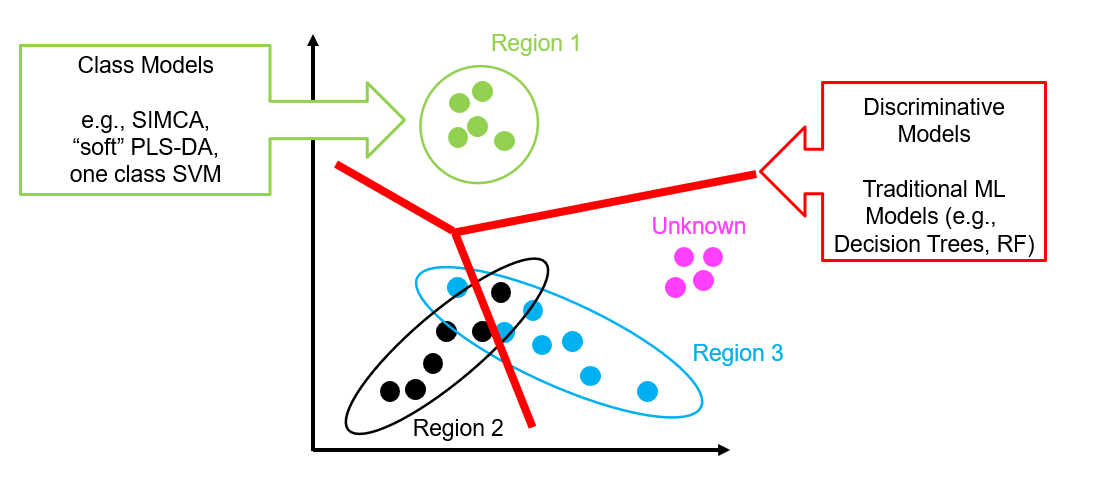

There are [2 ways to train](https://www.sciencedirect.com/science/article/pii/S0169743916302799?via%3Dihub) such Class Models:
1. "Rigorous" way: use ONLY the information about the target class.  
    * Pros: does not need to be retrained when new unknown classes are discovered; is not biased by the classes that are already known.
    * Cons: often do not as perform as well (on paper) as other models because they lack the information to contrast with other classes.
2. "Compliant" way: use both the target class information and data from known alternatives.  Usually, this extra data helps with steps (1) and (3) above.
    * Pros: often producs "tighter" boundaries and is less susceptible to being fooled by known alternatives.
    * Cons: can give a false sense of security since the result is biased based on the known alternatives at training time, and unknown unknowns still exist out there!

## A Machine Learning Perspective

One way to simplify the problem is to collect many alternatives into a single "no" category, then train a "discriminative" classifier to tell the difference.  This pseudo-2 class problem is a common approach in the machine learning field, commonly referred to as "one-vs-rest" (OvR) or "one-vs-all" (OvA) scheme.  [Multiclass](https://scikit-learn.org/stable/modules/multiclass.html#onevsrestclassifier) classifiers often adopt this approach.


🗣 It is worth pausing to [define some more vocabulary](https://scikit-learn.org/stable/modules/multiclass.html) commonly used in the machine learning community before proceeding:

* Binary classifier - in this case, each sample is assumed to belong to one of two possible, mutually exclusive classes.

$$
Y =
\begin{bmatrix}
{\rm Authentic} \\
{\rm Inauthentic} \\
\vdots \\
{\rm Authentic} \\
\end{bmatrix}
$$

* Multiclass classifier - a generalization of a binary classifier to more than 2 options.  For example, if we are trying to determine the country of origin for a fruit, there is only one right answer, but there are many countries.  In some chemometric communities these models are considered "hard".

$$
Y =
\begin{bmatrix}
{\rm Mexico} \\
{\rm Uraguay} \\
\vdots \\
{\rm Slovenia} \\
\end{bmatrix}
$$

* Multilabel classification - in this case, each sample could given up to some $N_{\rm max}$ number of labels; in other words, these classes are not mutually exclusive.  This situation can arise when a model could assign the aforementioned fruit to multiple origins; although that might seem counterintuitive, in authentication problems this tells us that (according to the model) the sample is *consistent* with all of these possibilities.  In some chemometric communities these models are considered "soft".

$$
Y =
\begin{bmatrix}
{\rm Mexico} & {\rm Argentina} & \dots & {\rm USA} \\
{\rm Uraguay} & \emptyset & \dots & \emptyset\\
\vdots & \dots & \ddots & \vdots \\
{\rm Slovenia} & {\rm Italy} & \emptyset & \emptyset \\
\end{bmatrix}
$$

* Multioutput regression - these models predict multiple numerical properties for each sample; for example, it could predict both the latitude and longitude.  PLS2 regression is an example of a such a model.

$$
Y =
\begin{bmatrix}
1.1 & \dots & 100.5 \\
36.4 & \dots & 2.2 \\
\vdots & \ddots & \vdots \\
4.7 & \dots & -9.0 \\
\end{bmatrix}
$$

Until relatively recently, the OvA approach was favored by the ML community as the approach to cases where a class model would be justified.  In part, this because the problem resembles a novelty detection system, and there was already a large body of work done in this area.  

🗣 Again, it is worth defining some [vocabulary](https://scikit-learn.org/stable/modules/outlier_detection.html):

* Outlier detection - in this case, the training data is considered "dirty" and includes outliers which are defined as observations that are "far away" from the rest. They tend to focus on trying to model the "density" of points in space and treat points from low density regions as outliers.  

* Novelty detection - in this case, the training data is considered "clean" and does not contain and outliers.  These models learn only from the "inliers" and try to predict outliers based on how "far away" test points are. In this context an outlier is also called a novelty. Yes, this is confusing. 😖

The chemometric community has algorithms that make different assumptions about whether or not the starting data is clean so it is important to understand this distinction when comparing methods from the different communities.  For example, it may not be possible to certify where samples have come from in authentication scenarios so it makes sense to assume there will be some inauthentic data in your training set.  If you can certify the chain of custody and trust all of your data, it may make more sense to the dataset is clean.  It just depends on your use case.

Below is a reproduction of a comparison between different detectors available in [scikit-learn](https://scikit-learn.org/stable/modules/outlier_detection.html#overview-of-outlier-detection-methods).

---
> ❗ Which looks the "best" to you?
---

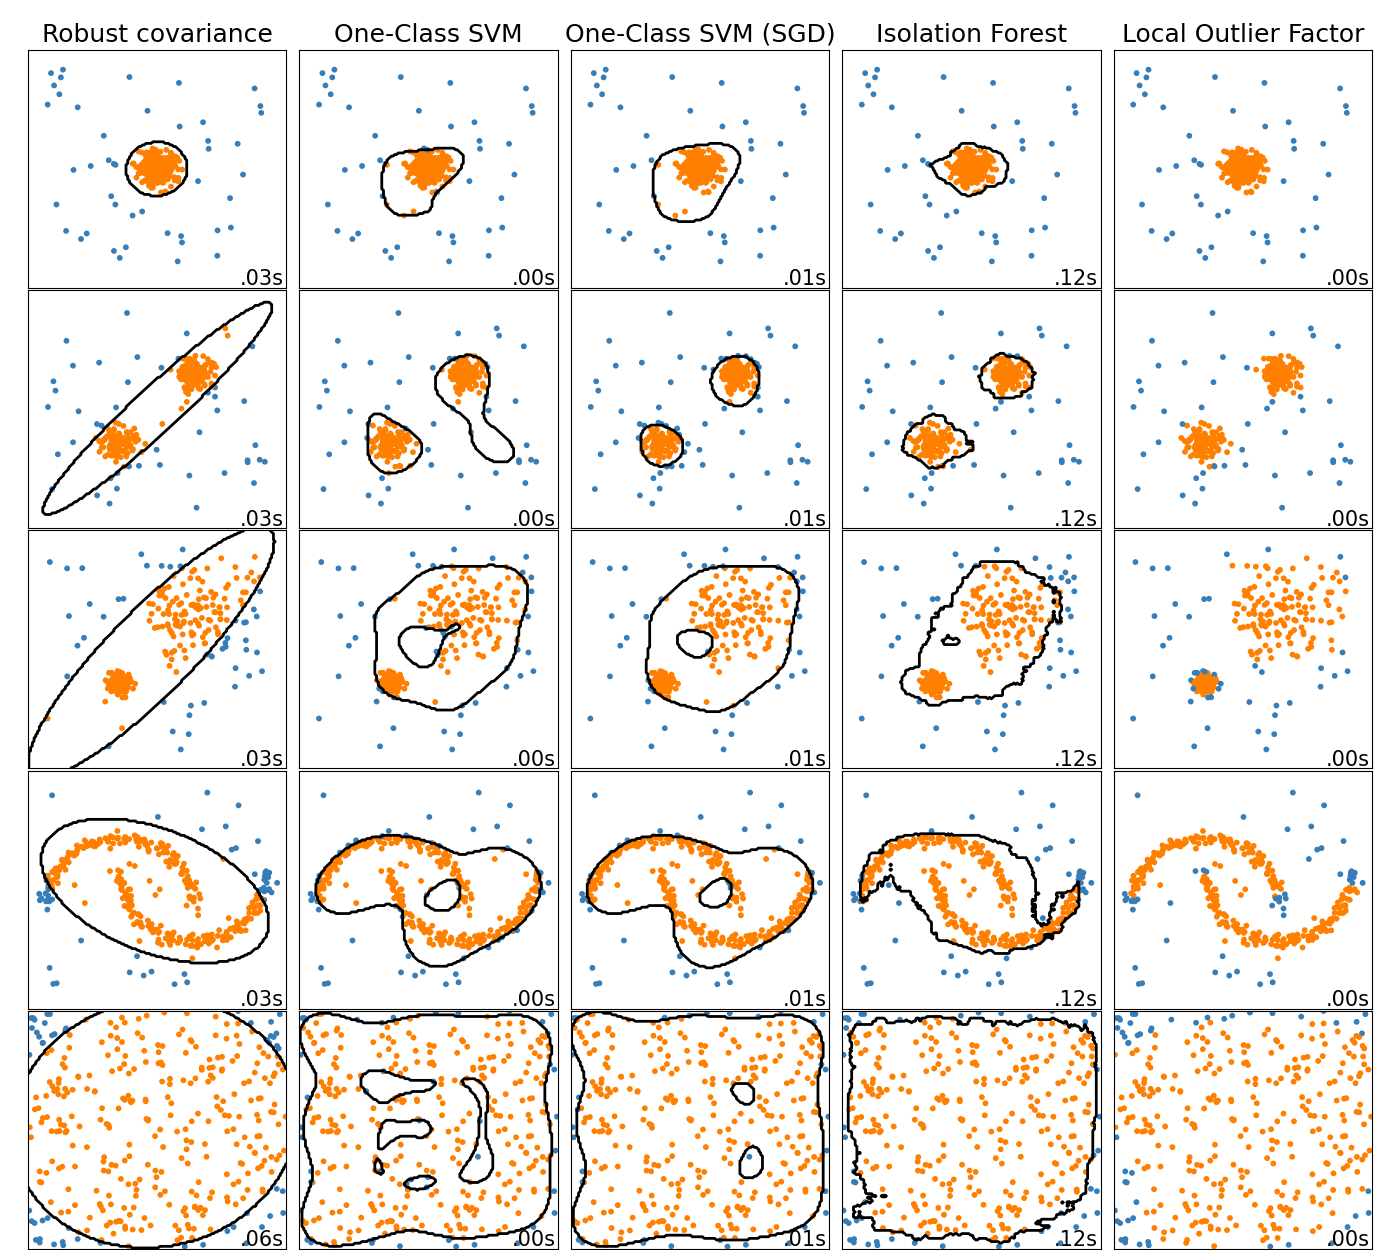

In 2013 a paper was published in the ML (specifically, computer vision) community which helped refocus attention on authentication scenarios where class models are more appropriate.  This paper, ["Toward Open Set Recognition," by Scheirer et al.](https://ieeexplore.ieee.org/abstract/document/6365193) raised the motivating point that:

> "To date, almost all experimental evaluations of machine learning-based recognition algorithms in computer vision have taken the form of 'closed set' recognition, whereby all testing classes are known at training time. A more realistic scenario for vision applications is 'open set' recognition, where incomplete knowledge of the world is present at training time, and unknown classes can be submitted to an algorithm during testing."

In their schematic below, "multi-class classification" is the conventional approach, "detection" is akin to OCC or authentication scenarios, and "Open Set Recognition" is an extension of this to include the possibility of recognizing more than just 1 know class from a sea of many alternatives.


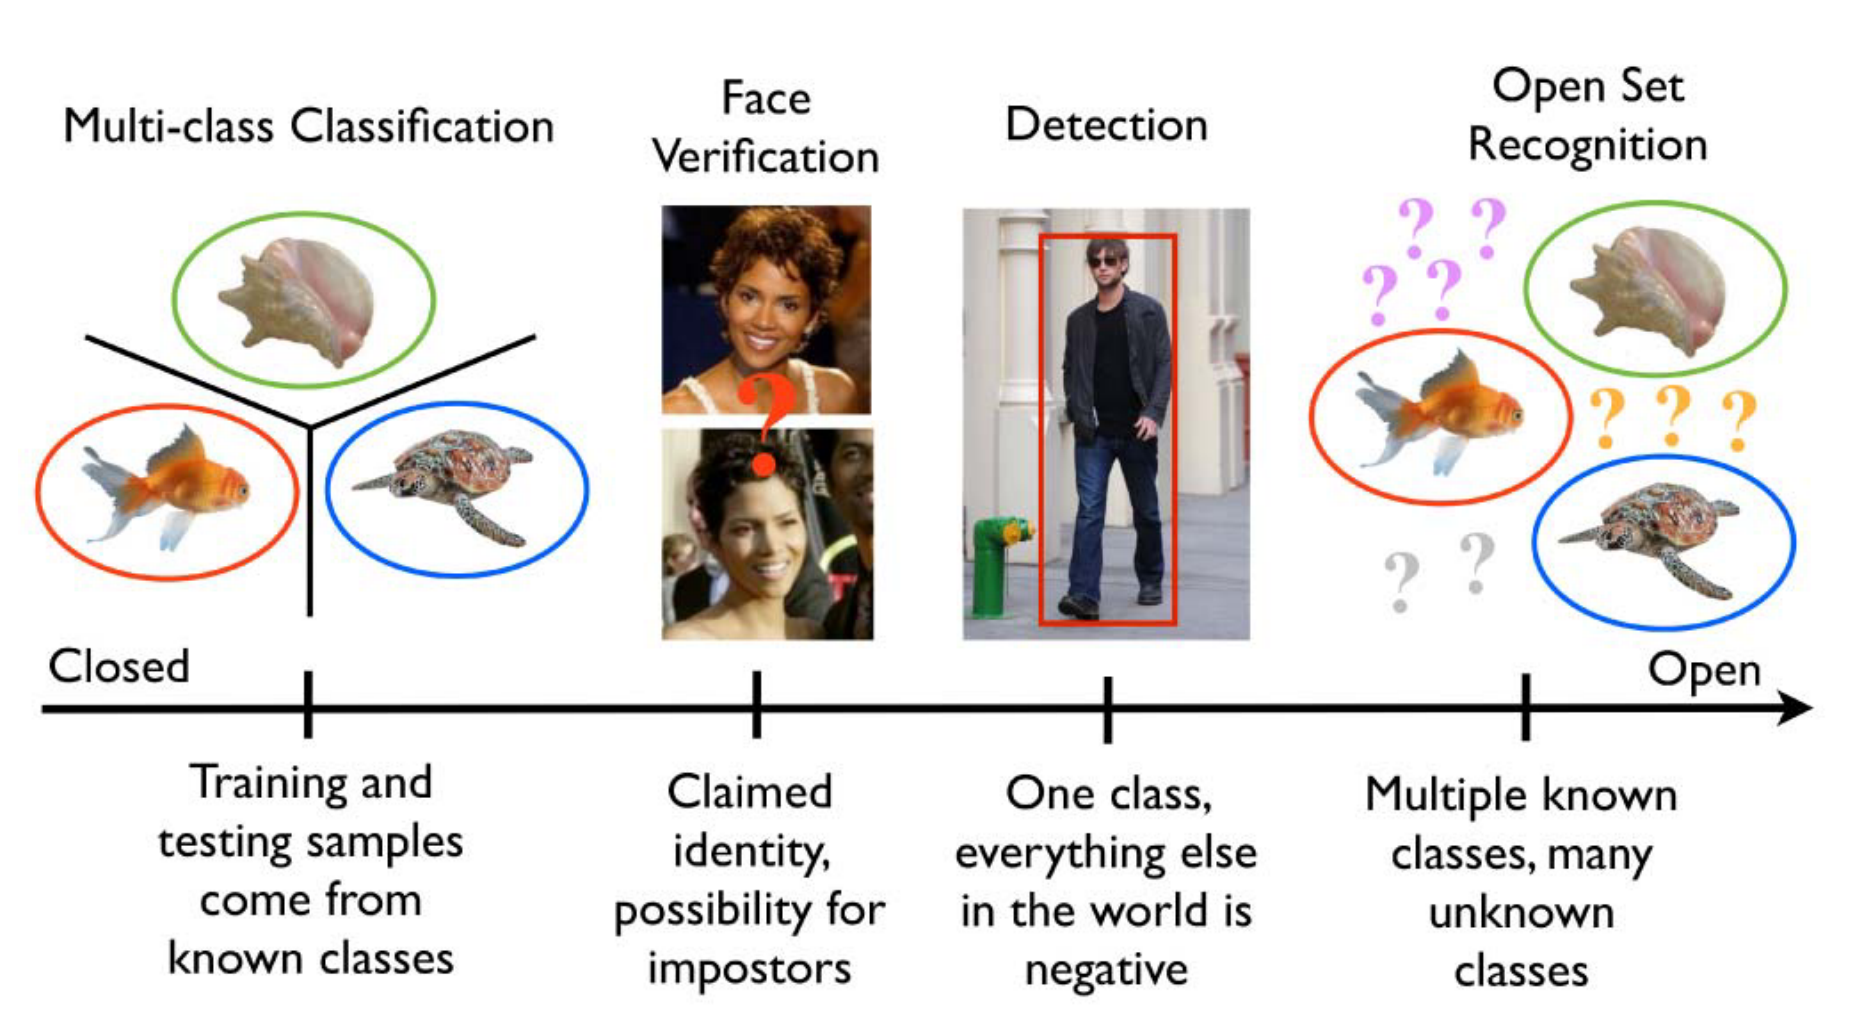

Other related terms include:
* [Open set recognition (OSR)](https://ieeexplore.ieee.org/abstract/document/6365193) - in this case, a model is trained on $K$ known classes, but expected to encounter $N > K$ during testing where $N$ is considered finite.  OCCs are the limit where $K = 1$.  We expect the model to make an assignment to one of the $K$ knowns or respond "none of the above" by [differentiating samples that are "in distribution" (ID) and should be predicted by the model vs. those "out of distribution" (OOD) which should not be.](https://arxiv.org/pdf/2110.14051)
* [Open world recognition](https://www.cv-foundation.org/openaccess/content_cvpr_2015/papers/Bendale_Towards_Open_World_2015_CVPR_paper.pdf) - a model which operates under open set conditions, but can dynamically add new "known" classes over time.  In principle, $N$ is unbounded.
* [Out-of-distribution detection (OOD)](https://arxiv.org/pdf/2110.14051) - considered the broadest term, encompassing OSR, novelty detection, etc.; the essence of OOD is detecting when a sample seen during the test phase comes from a different distribution than what was seen during training.  OOD is canonically associated with OSR but "encompasses a broader spectrum of learning tasks and solution space" as detailed [here](https://arxiv.org/pdf/2110.14051). This [manuscript](https://arxiv.org/pdf/2110.11334) offers a nice review and the figure below is taken from it.

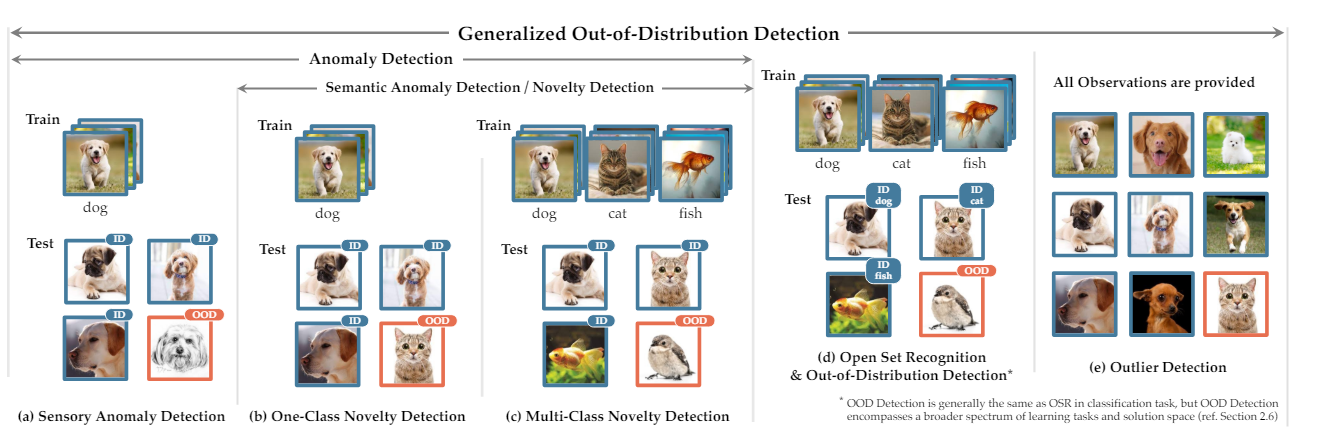

Chemometric authentication models have similar characteristics, but most of the time fit best under the OSR label.

Since most ML models are "closed set" multiclass classifiers that are trained to recognize a finite set of known classes, we can turn them into multiclass OSR classifiers by using an outlier / novelty detection routine.  [There are many outlier / novelty detectors out there to choose from.](https://pyod.readthedocs.io/en/latest/)  Here is some pseudo code:

```python
class MyOSR:
  def __init__(self, closed_set_classifier, outlier_detector):
    self.clf = closed_set_classifier
    self.od = outlier_detector

  def fit(self, X_train, y_train):
    # Train the outlier detector
    self.od.fit(X_train)
    
    # Predict the inliers
    inlier_mask = self.od.predict(X_train)
    X_inliers = X_train[inlier_mask]

    # Only train the classifier on the inliers
    self.clf.fit(X_inliers, y_train[inlier_mask])

  def predict(self, X_test):
    # At prediction time, screen out the outliers
    predictions = np.array(['UNKNOWN']*X_test.shape[1], dtype=str)

    # Predict for the inlier point only
    inlier_mask = self.od.predict(X_test)
    predictions[inlier_mask] = self.clf.predict(X_test[inlier_mask])

    return predictions
```

# N << p

If $N$ is the number of observations we have and $p$ is the number of features (properties) we have for each observation, we can describe our data set with a feature matrix, $X$ which has dimensions $n \times p$.

In statistical analysis, curve fitting, and many other areas of science and engineering we are often presented with many observations of only a few features ($p << N$).  For example, if we want to fit 10-100 points to a line ($p = 1$).

$$
X =
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    \dots \\
    x_N
\end{bmatrix} =
\begin{bmatrix}
    1.2 \\
    2.5 \\
    1.0 \\
    \dots \\
    3.1
\end{bmatrix}
$$

👉 Modeling the system with line where $y = mx + b$, we have 2 unknowns ($m$ and $b$). If we center the system by subtracting the mean such that $\hat{y} = y - \bar{y}$, we can actually eliminate the intercept term, $b$, and simply fit $\hat{y} = mx$ so that there is only 1 free parameter.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

X = np.array([-3, -2, -1, 0, 1, 2, 3, 4, 5]).reshape(-1,1)
y = np.array([-0.1, 1.5, 2.1, 3.1, 3.9, 5.1, 5.9, 6.5, 8.5])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

axes[0].plot(X, y, 'o')
axes[0].axvline(0, color='red')
axes[0].axhline(0, color='red')

axes[1].plot(X, y - np.mean(y), 'o')
axes[1].axvline(0, color='red')
axes[1].axhline(0, color='red')

for ax in axes:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

The solution to this coefficient using an ordinary least squares regression approach is:

$$
m = (X^TX)^{-1}X^Ty.
$$

It is a common problem in chemometric 📏 applications that we find $N << p$.  For example, when measuring:

* spectra (NMR, mass, PGAA, etc.) which are recorded at many wavenumbers, energies, etc. ($p \approx 10,000$)
* the levels of many trace organic contaminants ($p \approx 1,000$)
* the levels of stable isotopes and trace elements in a compound ($p \approx 100$)

Comparatively, we often have on the order of $N \approx 10$ samples that these properties (or features) are measured in.  Mathematically, this creates a problem because we end up having more unknowns (for example, coefficients) than knows (data points), so conventional curve fitting will fail.  Recall that to fit a polynomial of degree $N$ you need at least $N+1$ points.
* A line ($N=1$) needs 2 points,
* A quadratic ($N=2$) needs 3 points,
* $\dots$

❗ This is because computing the inverse of the matrix product above is not possible.

In [ ]:
import numpy as np
import pprint
np.random.seed(42)

# Create a dummy matrix with N < p.
X_chemo = np.random.random((2, 6))

# Create a dummy matrix with N > p for comparison.
X_regr = np.random.random((6, 2))

# Try to evaluate the inverse of the matrix product above.
np.linalg.inv(np.matmul(X_regr.T, X_regr))

---
> ❗ Try to evaluate the inverse of the matrix product below.
---

In [ ]:
# Try to evaluate the inverse of the matrix product above.
np.linalg.inv(np.matmul(X_chemo.T, X_chemo))

🙋 To circumvent this, we generally need to reduce ⬇ the dimensionality of the problem.  This is often accomplished with PCA, or a related technique, though many other options exist today.

# Regression, Classification, and Clustering

There are 3 main tasks in chemometric modeling, just as in machine learning.  For now, we will just define the terms 🗣 since these topics are nicely discussed and well-demonstrated in other places, such as [scikit-learn's documentation](https://scikit-learn.org/stable/index.html).

1. [Classification](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) - Identifying which category an object belongs to. (image credit to [sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html))


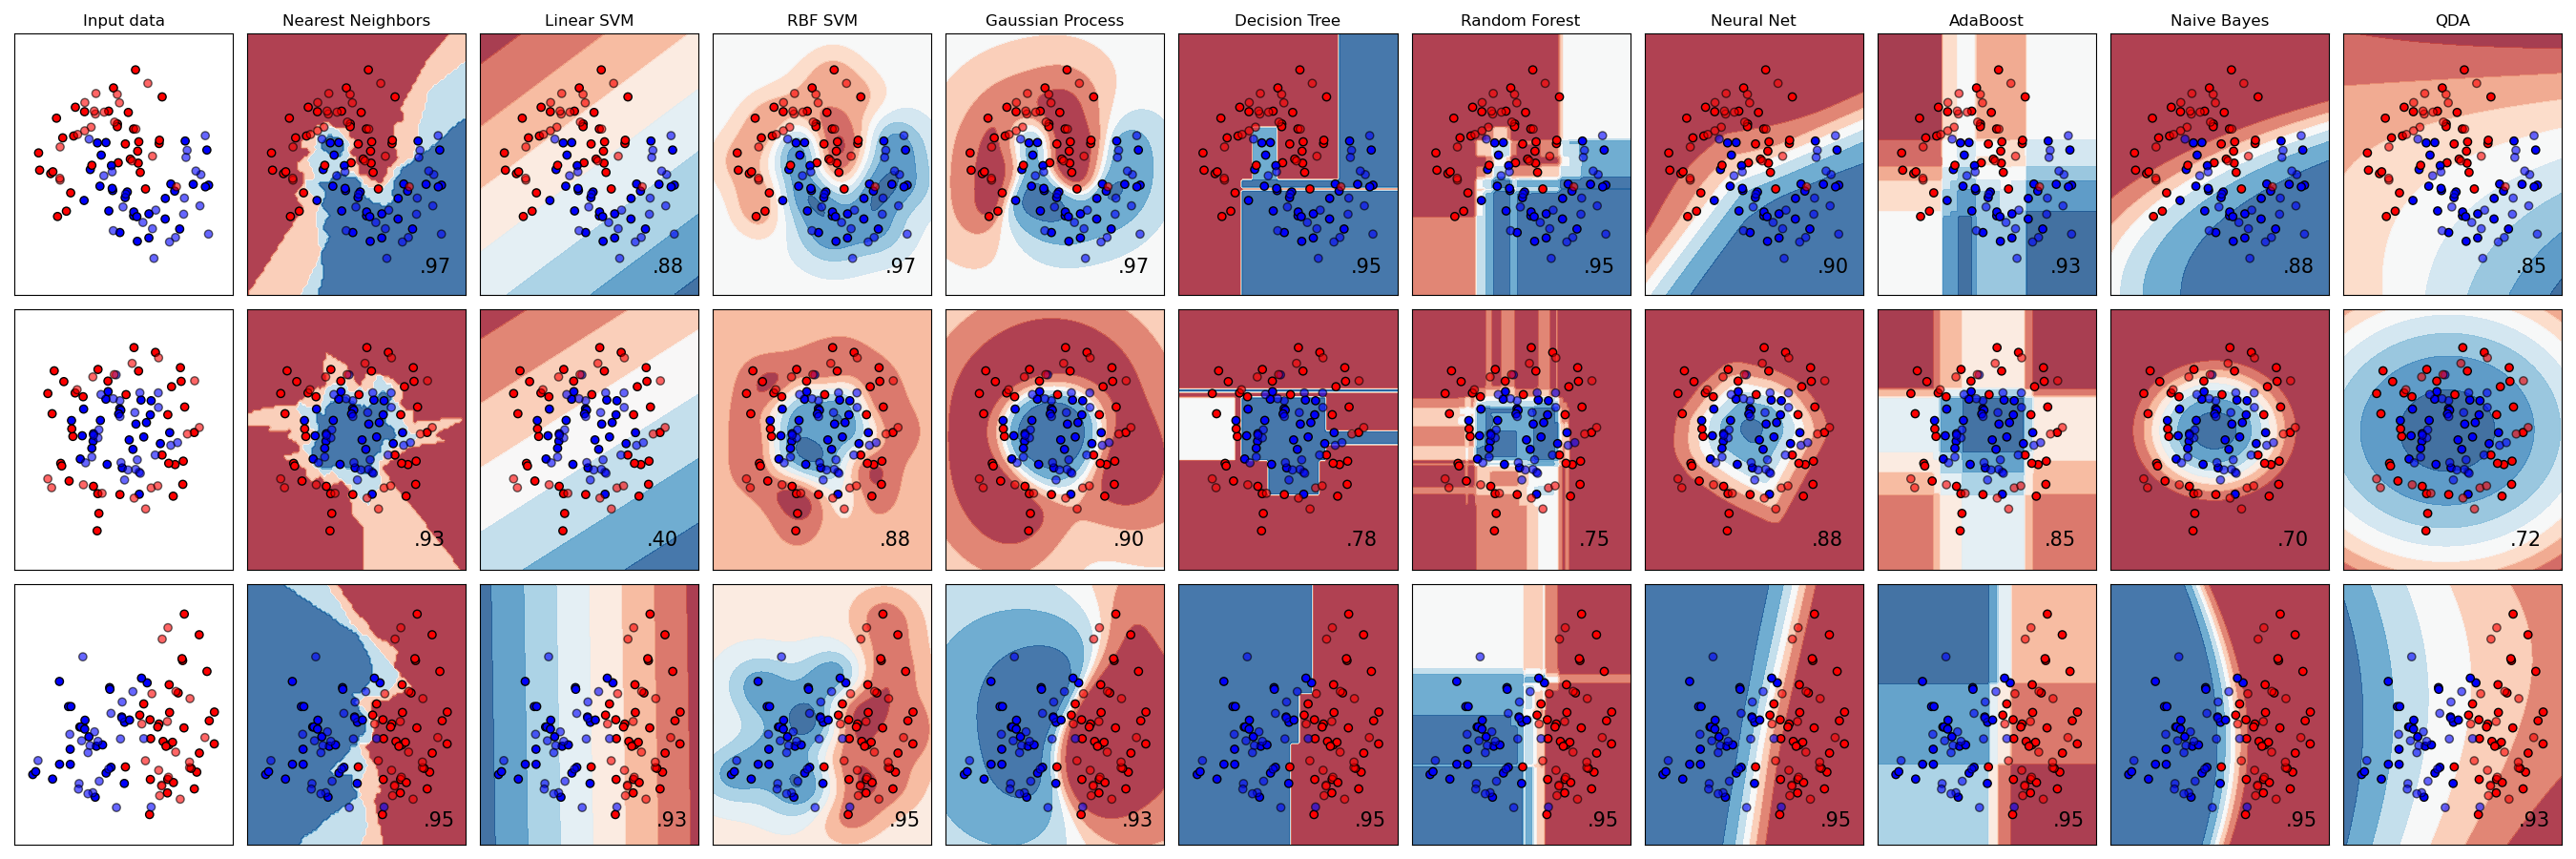

2. [Regression](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) - Predicting a continuous-valued attribute associated with an object. (image credit to [sklearn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html))

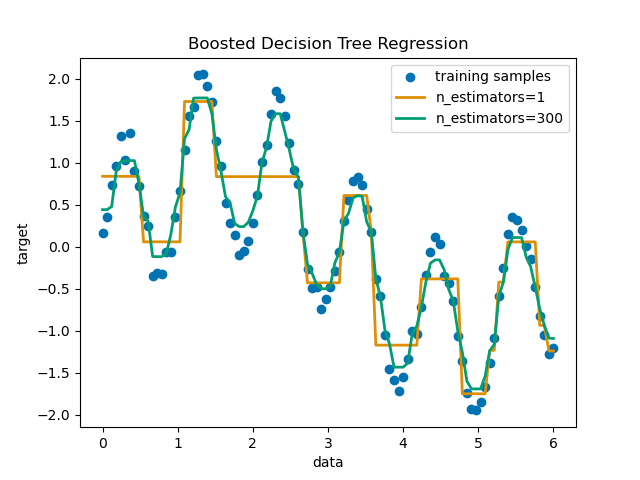

3. [Clustering](https://scikit-learn.org/stable/modules/clustering.html#clustering) - Automatic grouping of similar objects into sets. (image credit to [sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html))


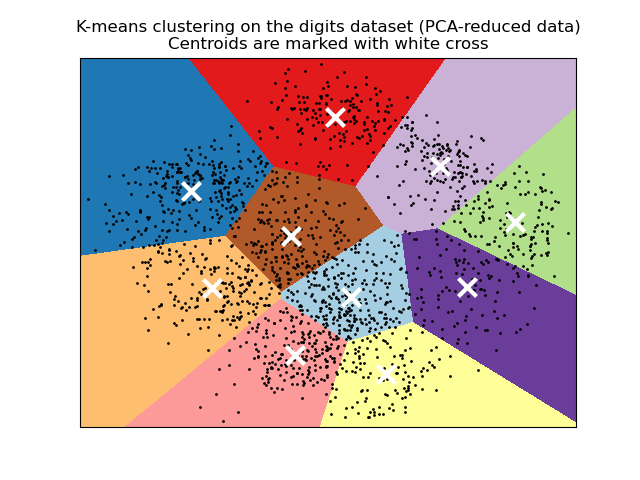

Tasks can be further subdivided based on how much of the target information you use during model development.

* [Supervised learning](https://scikit-learn.org/stable/glossary.html#term-supervised) involves using both $X$ and $y$ during training.  For example, in classification you need to specify which class each observation belongs to to train the model.  Similarly, with regression you need to provide the value you are trying to fit to (e.g., linear regression).
* [Unsupervised learning](https://scikit-learn.org/stable/glossary.html#term-unsupervised-learning) is the opposite case when no $y$ information is available during training.  For example, a PCA model uses only $X$ data - in fact, many clustering, outlier detectors, and dimensionality reduction routines are unsupervised.

👉 Since "rigorous" one-class classifiers are supposed to be trained on only the target class this information is implicitly present in the model (it is just that all the $y$ labels are the same).  Thus, we consider such models to be sueprvised.

# [scitkit-learn](https://scikit-learn.org/stable/)

The [scikit-learn](https://scikit-learn.org/stable/index.html), or sklearn, Python package is a renowned tool for predictive modeling.  It's widespread use and adoption makes it effectively a community standard.  There are several reasons for its success, but one of the most important is its well-designed and extensible [estimator API](https://scikit-learn.org/stable/developers/develop.html#developing-scikit-learn-estimators).  An [API](https://en.wikipedia.org/wiki/API) is an "application programming interface" which is how computer programs or components communicate with each other (vs. a user interface).  Basically, this well thought-out standard way of making parts interact with each other enables us to extend the tool in many ways so that our new components work correctly with all the tools already in sklearn.

"Estimators" are a class (see examples above) that can include different interfaces (member functions) that make them either a transformer 🚗, or a predictor 👆.
* 🚗 Transformers take the data they are given and modify data it in some way.  For example, it could accept $X$, perform PCA, and output the feature matrix following dimensionality reduction to a fixed size.  These classes need to implement both `fit` and `transform` functions.
* 👆 Predictors make a prediction about each observation; for example, they could predict a floating point (regression) or do classification. These classes need to implement both `fit` and `predict` (and/or a `predict_proba`) functions.  For predictors to be models they should also have a `score` function.

The function `fit` should be called first to "learn" from the training data.  Later, `predict` / `transform` is used on the test set.

sklearn has provided a full guide to [rolling your own estimator](https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator) and [checks](https://scikit-learn.org/stable/modules/generated/sklearn.utils.estimator_checks.check_estimator.html#sklearn.utils.estimator_checks.check_estimator) to ensure compatibility; however, we will just demonstrate the basics to illustrate why this is such a powerful tool. Below is a simple example of a classifier from their documentation.

```python
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances

class MyClassifier(BaseEstimator, ClassifierMixin):
    """
    A simple nearest neighbor classifier.
    """
    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        self.X_ = X
        self.y_ = y

        # Return the classifier
        return self

    def predict(self, X):
        # Check if fit has been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)

        closest = np.argmin(euclidean_distances(X, self.X_), axis=1)

        return self.y_[closest]

    def score(self, X, y):
        check_is_fitted(self)
        X, y = check_X_y(X, y)

        predictions = self.predict(X)
        accuracy = np.sum(predictions == y) / len(y)

        return accuracy
```

Here is a simple example of a transformer.

```python
from sklearn.decomposition import PCA

class MyTransformer(TransformerMixin, BaseEstimator):
    """
    Perform dimensionality reduction using PCA.
    """
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X, y=None):
        # Fit a PCA model to the training data.
        self.pca = PCA(self.n_components)
        self.pca.fit(X)

        return self

    def transform(self, X):
        # Perform the PCA transformation on the data.
        return self.pca.transform(X)
```

---
> ❗ Trying looking at some estimators in sklearn below.
---

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler

# This is a transformer.
??StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression

# This is a regressor.
??LinearRegression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# This is a classifier.
??KNeighborsClassifier

Estimators can be combined into [pipelines](https://scikit-learn.org/stable/modules/compose.html#build-a-pipeline) which are a sequence of classes that operate on the data.  You can easily combine several transformers to preprocess your data and end the pipeline with a predictive model so that you have a composite data ingestion, processing, and prediction tool all-in-one! 💯 One major advantage is that you can optimize parts of the composite estimator ("hyperparameters") and perform statistical tests (cross-validation, etc.) over the entire pipeline! 🔩

👉 We will see a lot of examples of this in the next part of the course.   Here is a simple example of how a pipeline can be used.

```python
from sklearn.pipeline import Pipeline
pipe = Pipeline(
    steps=[
        ('autoscaler', StandardScaler(with_mean=True, with_std=True)),
        ('reduce_dim', MyTransformer(n_components=3)),
        ('classifier', MyClassifier())
    ]
)

# This calls the `.fit` function for each member of the pipeline.
# Then it calls `.transform` before handing the transformed data to the next
# step.
pipe.fit(X_train, y_train)

# This calls the `.transform` function for the first 2 steps, then `.predict`
# for the classifier.
pipe.predict(X_test, y_test)
```

# [PyChemAuth](https://pychemauth.readthedocs.io/en/latest/index.html)

[PyChemAuth](https://pychemauth.readthedocs.io/en/latest/index.html) is a Python package we have been building that is based on the sklearn estimator API.  As a result, it is interoperable with the tools and features of sklearn.  Moreover, it is also compatible with the large body of 3rd party packages which follow this API as well.  Remember, an API is just a way an enforcing a standard way of making computer code / components interact with each other.

* sklearn contains many standard tools and models used in the field of machine learning, but does not include many statistical and class models used in chemometrics. It is also stable and under active development.
* PyChemAuth extends this to include chemometric models, which have historically been developed in other languages and have variable implementations in the literature.
* By using a standard, popular API these tools are also compatible with new python-based AI/ML tools as they are continuously developed, since they almost always also follow this API standard.

👉 These means that methods from the past, present, and future can be compared side-by-side.  This enables workflows to be standardized, and best practices to be developed.

Typically, data requirements, model explainability, and model power (e.g., accuracy) all need to be balanced to arrive the model most fit for a given purpose.  This is as much an art 🎨 as a science 🔬 so having a standard resources is important because they allow people to perform

* 🔁 Reproducible work, while
* 📚 Learning from each other, which leads to
* ♻ Reusable code and workflows that save time 🕐 and effort 💪 in the end.

This course is intended to present the package and make users familiar with this (growing) ecosystem of tools. 🔧

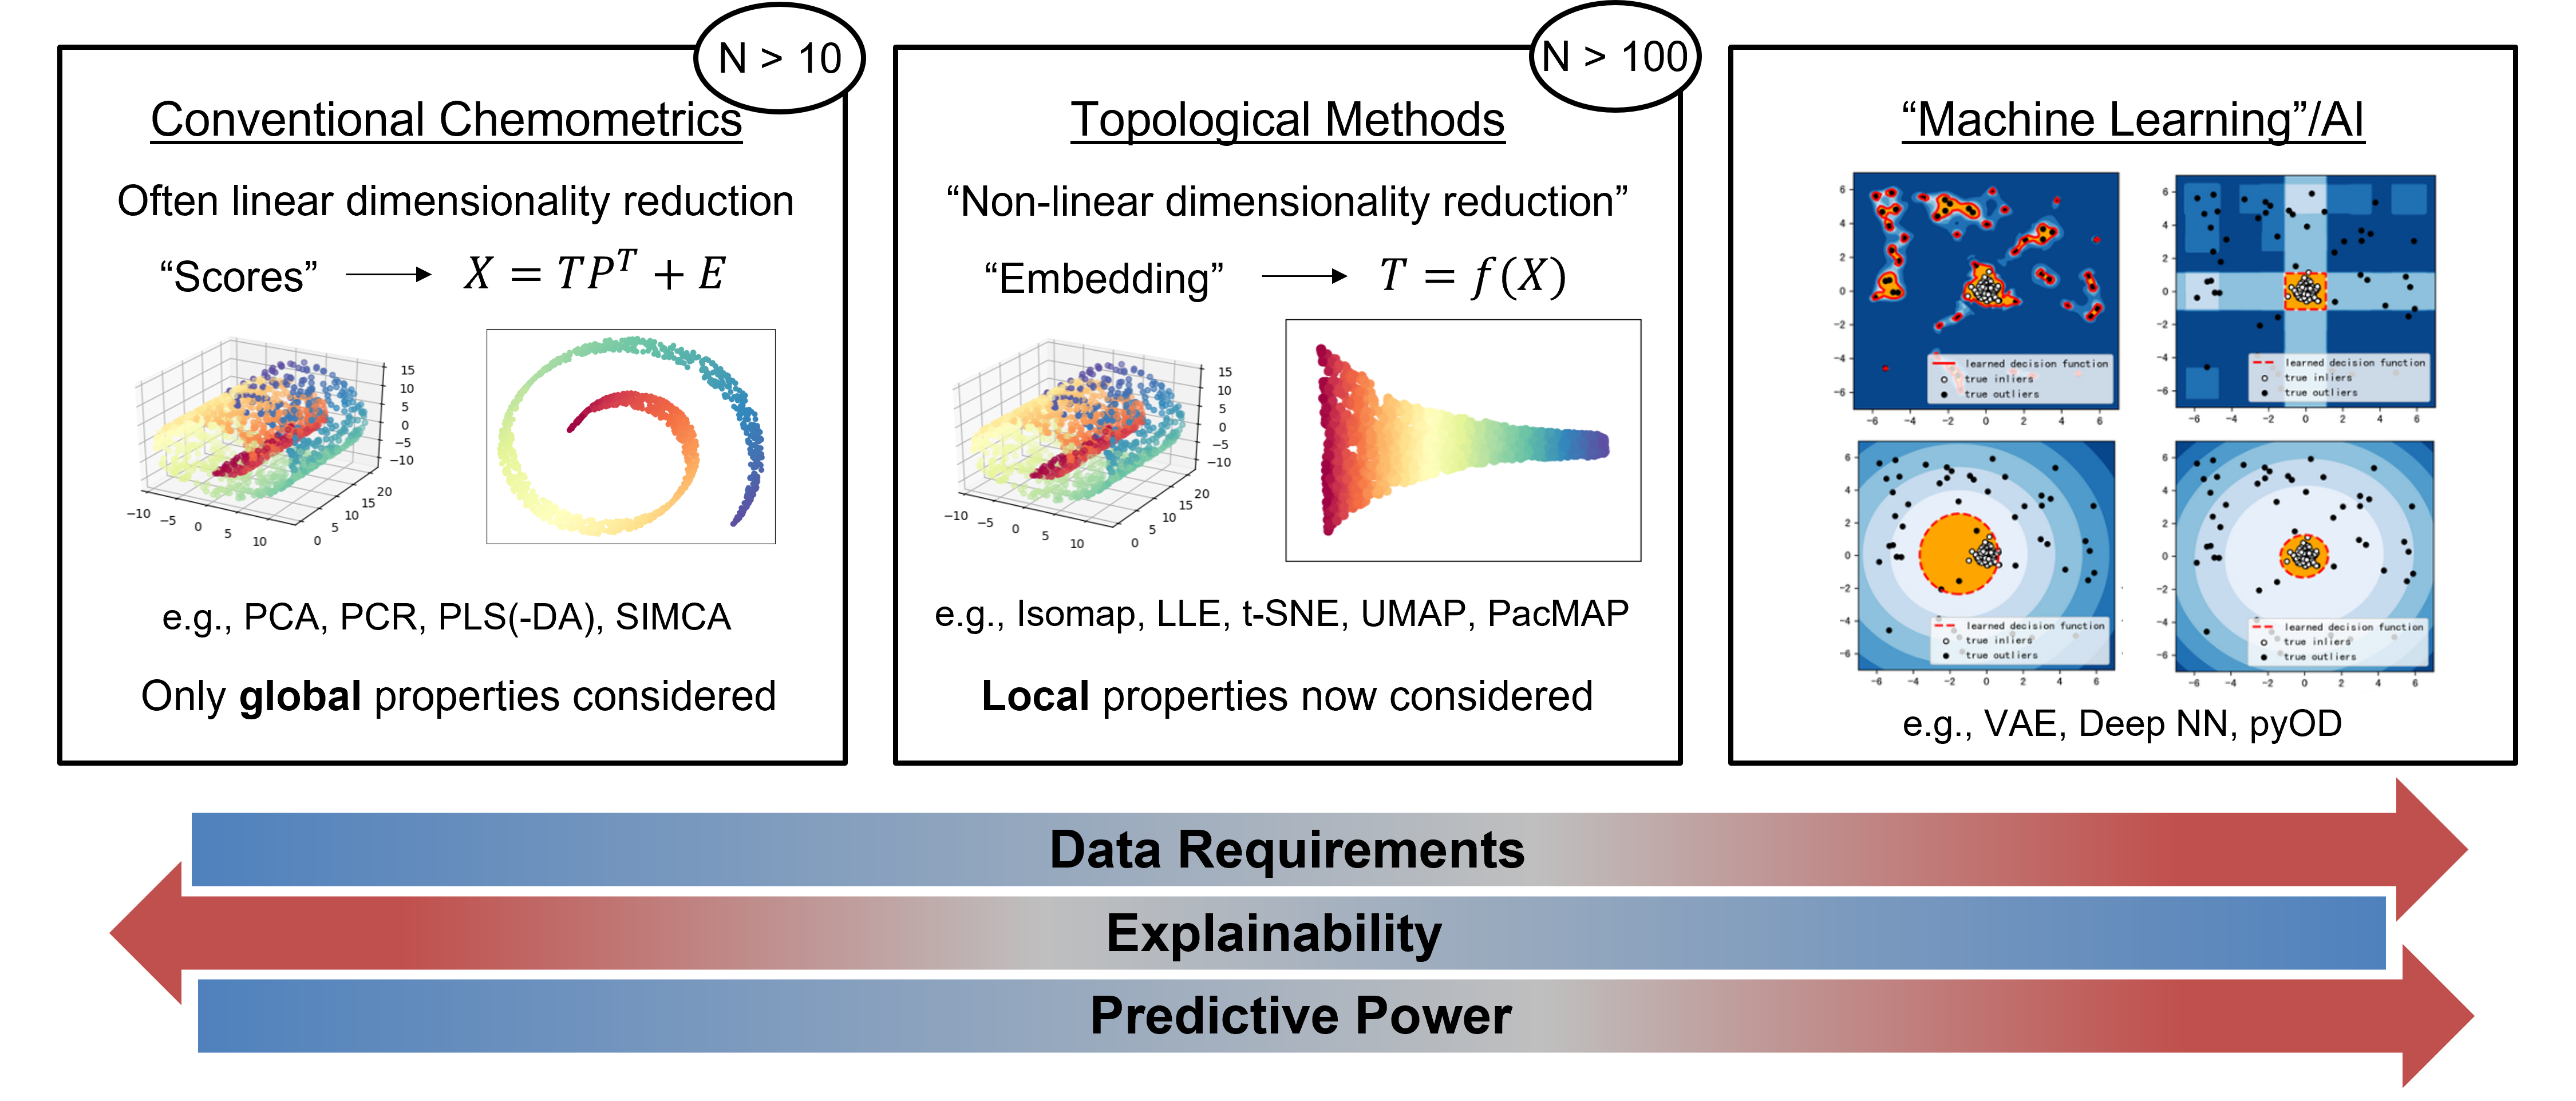